In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
# Визуализация матрицы корреляций

def plot_correlation_matrix(corr_mtrx):
    f = plt.figure(figsize=(8, 8))
    plt.matshow(corr_mtrx, fignum=f.number)
    plt.xticks(range(corr_mtrx.shape[1]), fontsize=9, rotation=45)
    plt.yticks(range(corr_mtrx.shape[1]), fontsize=9)
    cb = plt.colorbar()
    plt.title('Correlation Matrix', fontsize=10)

# Загрузка выборки

In [3]:
df = pd.read_csv('weatherAUS.csv', header = 0, sep = ',')

In [4]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


# Предобработка

In [7]:
y = df['RainTomorrow']

In [8]:
X = df.drop(['RainTomorrow'], axis='columns', inplace=False)
X

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0


In [9]:
#Заменяем названия Location, WindGustDir, WindDir9am, WindDir3pm, RainToday, RainTomorrow на числа (категориальные признаки)
def get_dict_categories(feature):
    d = {}
    l = 0.
    for elem in feature:
        if elem not in d.keys():
            d.update({elem : l})
            l += 1.
    return d
d_loc = get_dict_categories(X['Location'])
d_wind_gust_dir = get_dict_categories(X['WindGustDir'])
d_wind_dir_9am = get_dict_categories(X['WindDir9am'])
d_wind_dir_3pm = get_dict_categories(X['WindDir3pm'])
d_rain_today = get_dict_categories(X['RainToday'])

X['Location'] = X['Location'].apply(lambda x: d_loc[x])
X['WindGustDir'] = X['WindGustDir'].apply(lambda x: d_wind_gust_dir[x])
X['WindDir9am'] = X['WindDir9am'].apply(lambda x: d_wind_dir_9am[x])
X['WindDir3pm'] = X['WindDir3pm'].apply(lambda x: d_wind_dir_3pm[x])
X['RainToday'] = X['RainToday'].apply(lambda x: d_rain_today[x])

In [10]:
X.info()
X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  float64
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    142193 non-null  float64
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     142193 non-null  float64
 10  WindDir3pm     142193 non-null  float64
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,2008-12-01,0.0,13.4,22.9,0.6,NaN,NaN,0.0,44.0,0.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,2008-12-02,0.0,7.4,25.1,0.0,NaN,NaN,1.0,44.0,1.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2008-12-03,0.0,12.9,25.7,0.0,NaN,NaN,2.0,46.0,0.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,2008-12-04,0.0,9.2,28.0,0.0,NaN,NaN,3.0,24.0,2.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0
4,2008-12-05,0.0,17.5,32.3,1.0,NaN,NaN,0.0,41.0,3.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,48.0,3.5,21.8,0.0,NaN,NaN,15.0,31.0,12.0,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0.0,0.0
142189,2017-06-21,48.0,2.8,23.4,0.0,NaN,NaN,15.0,31.0,2.0,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0,0.0
142190,2017-06-22,48.0,3.6,25.3,0.0,NaN,NaN,4.0,22.0,2.0,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0,0.0
142191,2017-06-23,48.0,5.4,26.9,0.0,NaN,NaN,5.0,37.0,2.0,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0,0.0


In [11]:
# Определяем, в каких признаках присутствуют NaN (и сколько)
feature_NaN = {}
for name, values in X.iteritems():
    feature_NaN.update({name : sum(pd.isnull(values))})
for key, value in feature_NaN.items():
    print('{key}: {value}'.format(key=key, value=value))

Date: 0
Location: 0
MinTemp: 637
MaxTemp: 322
Rainfall: 1406
Evaporation: 60843
Sunshine: 67816
WindGustDir: 0
WindGustSpeed: 9270
WindDir9am: 0
WindDir3pm: 0
WindSpeed9am: 1348
WindSpeed3pm: 2630
Humidity9am: 1774
Humidity3pm: 3610
Pressure9am: 14014
Pressure3pm: 13981
Cloud9am: 53657
Cloud3pm: 57094
Temp9am: 904
Temp3pm: 2726
RainToday: 0
RISK_MM: 0


In [12]:
# Функции для избавления от Nan-ов
# В данном датасете будем заменять Nan как ближайшее слева значение по дате

def find_nearest_not_null_right(f, n, pos):
    res = float('nan')
    for i in np.arange(pos, len(n)):
        if not n[i]:
            res = f[i]
            break
    return res
        
    

def change_NaN_on_middle(feature):
    nulls = pd.isnull(feature)
    res = []
    res.append(find_nearest_not_null_right(feature, nulls, pos = 0))
    for i in np.arange(1, len(feature) - 1):
        if not nulls[i]:
            res.append(feature[i])
        else:
            res.append(res[-1])
    
    if nulls[len(feature) - 1]:
        res.append(res[-1])
    else:
        res.append(feature[len(feature) - 1])
    print("done")
    return res

In [13]:
# Функция для определения наименьшего значения каждого признака
def get_feature_negatives(X):
    feature_negative = {}
    for name, values in X.iteritems():
        feature_negative.update({name : min(values)})
    #for key, value in feature_negative.items():
    #    print('{key}: {value}'.format(key=key, value=value))
    return feature_negative

# Избавление от отрицательных значений (сдвигаем все значения на min + 1)
def move_negatives(X):
    for key, value in get_feature_negatives(X).items():
        if value < 0:
            X[key] += 1 - value
    return X

# Наивный Байес

Обучаем модель с заменой NaN на ближайшее значение слева по дате

In [14]:
X_bias = X.drop(['Date'], axis='columns', inplace=False).copy(deep=True)
y_bias = y.copy(deep=True)

In [15]:
X_bias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  float64
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    142193 non-null  float64
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     142193 non-null  float64
 9   WindDir3pm     142193 non-null  float64
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

In [16]:
# Избавляемся от NaN значений
X_bias['MinTemp'] = change_NaN_on_middle(X_bias['MinTemp'])
X_bias['MaxTemp'] = change_NaN_on_middle(X_bias['MaxTemp'])
X_bias['Rainfall'] = change_NaN_on_middle(X_bias['Rainfall'])
X_bias['Evaporation'] = change_NaN_on_middle(X_bias['Evaporation'])
X_bias['Sunshine'] = change_NaN_on_middle(X_bias['Sunshine'])
X_bias['WindGustSpeed'] = change_NaN_on_middle(X_bias['WindGustSpeed'])
X_bias['WindSpeed9am'] = change_NaN_on_middle(X_bias['WindSpeed9am'])
X_bias['WindSpeed3pm'] = change_NaN_on_middle(X_bias['WindSpeed3pm'])
X_bias['Humidity9am'] = change_NaN_on_middle(X_bias['Humidity9am'])
X_bias['Humidity3pm'] = change_NaN_on_middle(X_bias['Humidity3pm'])
X_bias['Pressure9am'] = change_NaN_on_middle(X_bias['Pressure9am'])
X_bias['Pressure3pm'] = change_NaN_on_middle(X_bias['Pressure3pm'])
X_bias['Cloud9am'] = change_NaN_on_middle(X_bias['Cloud9am'])
X_bias['Cloud3pm'] = change_NaN_on_middle(X_bias['Cloud3pm'])
X_bias['Temp9am'] = change_NaN_on_middle(X_bias['Temp9am'])
X_bias['Temp3pm'] = change_NaN_on_middle(X_bias['Temp3pm'])

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


In [17]:
# Избавляемся от отрицательных значений (сдвигаем все значения на min + 1)
X_bias = move_negatives(X_bias)

In [18]:
# Разобьем выборку на train-test:

X_train, X_test, y_train, y_test = \
    train_test_split(X_bias, y_bias, test_size=0.25, shuffle=False)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((106644, 22), (35549, 22), (106644,), (35549,))

In [20]:
%%time

classifier = MultinomialNB()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

CPU times: user 438 ms, sys: 8.79 ms, total: 447 ms
Wall time: 420 ms


In [21]:
prediction

array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype='<U3')

In [22]:
print(np.mean(prediction == y_test))

0.9225013361838589


Построим матрицу корреляций

In [23]:
corr_matrix = X_train.corr()

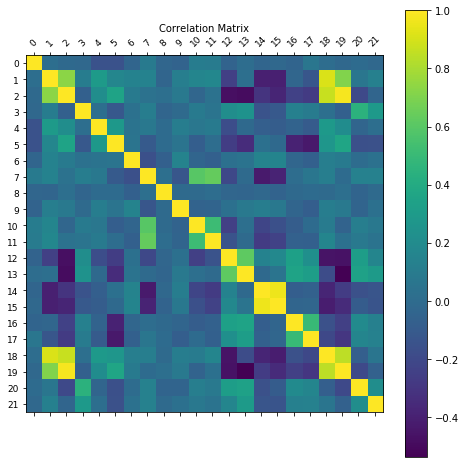

In [24]:
plot_correlation_matrix(corr_matrix)

In [25]:
X_bias

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,0.0,22.9,28.7,0.6,12.0,12.3,0.0,44.0,0.0,0.0,...,71.0,22.0,1007.7,1007.1,8.0,2.0,25.1,28.2,0.0,0.0
1,0.0,16.9,30.9,0.0,12.0,12.3,1.0,44.0,1.0,1.0,...,44.0,25.0,1010.6,1007.8,8.0,2.0,25.4,30.7,0.0,0.0
2,0.0,22.4,31.5,0.0,12.0,12.3,2.0,46.0,0.0,1.0,...,38.0,30.0,1007.6,1008.7,8.0,2.0,29.2,29.6,0.0,0.0
3,0.0,18.7,33.8,0.0,12.0,12.3,3.0,24.0,2.0,2.0,...,45.0,16.0,1017.6,1012.8,8.0,2.0,26.3,32.9,0.0,1.0
4,0.0,27.0,38.1,1.0,12.0,12.3,0.0,41.0,3.0,3.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,26.0,36.1,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,48.0,13.0,27.6,0.0,6.4,10.7,15.0,31.0,12.0,2.0,...,59.0,27.0,1024.7,1021.2,8.0,7.0,17.6,27.3,0.0,0.0
142189,48.0,12.3,29.2,0.0,6.4,10.7,15.0,31.0,2.0,7.0,...,51.0,24.0,1024.6,1020.3,8.0,7.0,18.3,28.8,0.0,0.0
142190,48.0,13.1,31.1,0.0,6.4,10.7,4.0,22.0,2.0,12.0,...,56.0,21.0,1023.5,1019.1,8.0,7.0,19.1,30.9,0.0,0.0
142191,48.0,14.9,32.7,0.0,6.4,10.7,5.0,37.0,2.0,0.0,...,53.0,24.0,1021.0,1016.8,8.0,7.0,20.7,32.5,0.0,0.0


Видно, что очень сильно коррелируют 2 и 19 (Temp3pm и MaxTemp), 14 и 15 (Pressure9am и Pressure3pm) признаки

Отбросим 2 и 14 признаки

In [26]:
X_bias.drop(['MaxTemp', 'Pressure9am'], axis='columns', inplace=True)

In [27]:
# Разобьем выборку на train-test:

X_train, X_test, y_train, y_test = \
    train_test_split(X_bias, y_bias, test_size=0.25, shuffle=False)

In [28]:
X_bias

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,0.0,22.9,0.6,12.0,12.3,0.0,44.0,0.0,0.0,20.0,24.0,71.0,22.0,1007.1,8.0,2.0,25.1,28.2,0.0,0.0
1,0.0,16.9,0.0,12.0,12.3,1.0,44.0,1.0,1.0,4.0,22.0,44.0,25.0,1007.8,8.0,2.0,25.4,30.7,0.0,0.0
2,0.0,22.4,0.0,12.0,12.3,2.0,46.0,0.0,1.0,19.0,26.0,38.0,30.0,1008.7,8.0,2.0,29.2,29.6,0.0,0.0
3,0.0,18.7,0.0,12.0,12.3,3.0,24.0,2.0,2.0,11.0,9.0,45.0,16.0,1012.8,8.0,2.0,26.3,32.9,0.0,1.0
4,0.0,27.0,1.0,12.0,12.3,0.0,41.0,3.0,3.0,7.0,20.0,82.0,33.0,1006.0,7.0,8.0,26.0,36.1,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,48.0,13.0,0.0,6.4,10.7,15.0,31.0,12.0,2.0,15.0,13.0,59.0,27.0,1021.2,8.0,7.0,17.6,27.3,0.0,0.0
142189,48.0,12.3,0.0,6.4,10.7,15.0,31.0,2.0,7.0,13.0,11.0,51.0,24.0,1020.3,8.0,7.0,18.3,28.8,0.0,0.0
142190,48.0,13.1,0.0,6.4,10.7,4.0,22.0,2.0,12.0,13.0,9.0,56.0,21.0,1019.1,8.0,7.0,19.1,30.9,0.0,0.0
142191,48.0,14.9,0.0,6.4,10.7,5.0,37.0,2.0,0.0,9.0,9.0,53.0,24.0,1016.8,8.0,7.0,20.7,32.5,0.0,0.0


In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((106644, 20), (35549, 20), (106644,), (35549,))

In [32]:
%%time

classifier = MultinomialNB()
classifier.fit(X_train, y_train)
bias_prediction = classifier.predict(X_test)

CPU times: user 431 ms, sys: 4.06 ms, total: 435 ms
Wall time: 409 ms


In [33]:
bias_prediction

array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype='<U3')

In [34]:
print(np.mean(bias_prediction == y_test))

0.9233733719654561


Видим, что пусть и ненамного, но результат лучше, чем в прошлый раз, а именно, на 0.9% лучше

# Логистическая регрессия

In [35]:
X_log = X.drop(['Date'], axis='columns', inplace=False).copy(deep=True)
y_log = y.copy(deep=True)

In [36]:
X_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  float64
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    142193 non-null  float64
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     142193 non-null  float64
 9   WindDir3pm     142193 non-null  float64
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

In [37]:
# Избавляемся от NaN значений
X_log['MinTemp'] = change_NaN_on_middle(X_log['MinTemp'])
X_log['MaxTemp'] = change_NaN_on_middle(X_log['MaxTemp'])
X_log['Rainfall'] = change_NaN_on_middle(X_log['Rainfall'])
X_log['Evaporation'] = change_NaN_on_middle(X_log['Evaporation'])
X_log['Sunshine'] = change_NaN_on_middle(X_log['Sunshine'])
X_log['WindGustSpeed'] = change_NaN_on_middle(X_log['WindGustSpeed'])
X_log['WindSpeed9am'] = change_NaN_on_middle(X_log['WindSpeed9am'])
X_log['WindSpeed3pm'] = change_NaN_on_middle(X_log['WindSpeed3pm'])
X_log['Humidity9am'] = change_NaN_on_middle(X_log['Humidity9am'])
X_log['Humidity3pm'] = change_NaN_on_middle(X_log['Humidity3pm'])
X_log['Pressure9am'] = change_NaN_on_middle(X_log['Pressure9am'])
X_log['Pressure3pm'] = change_NaN_on_middle(X_log['Pressure3pm'])
X_log['Cloud9am'] = change_NaN_on_middle(X_log['Cloud9am'])
X_log['Cloud3pm'] = change_NaN_on_middle(X_log['Cloud3pm'])
X_log['Temp9am'] = change_NaN_on_middle(X_log['Temp9am'])
X_log['Temp3pm'] = change_NaN_on_middle(X_log['Temp3pm'])

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


In [38]:
# Разобьем выборку на train-test:

X_train, X_test, y_train, y_test = \
    train_test_split(X_log, y_log, test_size=0.25, shuffle=False)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((106644, 22), (35549, 22), (106644,), (35549,))

In [42]:
%%time

classifier = LogisticRegression(max_iter = 5000)
classifier.fit(X_train, y_train)
logistic_prediction = classifier.predict(X_test)

CPU times: user 41.1 s, sys: 410 ms, total: 41.5 s
Wall time: 10.6 s


In [43]:
print(np.mean(logistic_prediction == y_test))

0.9999718698134968


# Метод ближайших соседей

In [44]:
# Находим оптимальное количество соседей для обучения модели

n_nb = range(1, 30)
res = []

for i in n_nb: 
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)

    prediction = neigh.predict(X_test)

    res.append((np.mean(prediction == y_test)))
    print("done %", i)

done % 1
done % 2
done % 3
done % 4
done % 5
done % 6
done % 7
done % 8
done % 9
done % 10
done % 11
done % 12
done % 13
done % 14
done % 15
done % 16
done % 17
done % 18
done % 19
done % 20
done % 21
done % 22
done % 23
done % 24
done % 25
done % 26
done % 27
done % 28
done % 29


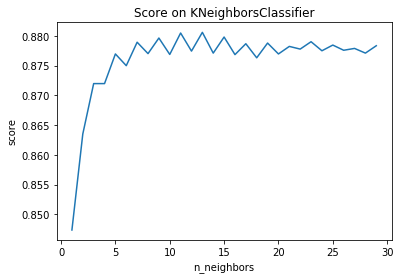

In [45]:
plt.plot(n_nb, res)
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.title("Score on KNeighborsClassifier")
plt.show()

In [47]:
res.index(max(res))

12

Видим, что наилучшее значение равно 12

In [49]:
%%time

classifier = KNeighborsClassifier(n_neighbors=12)
classifier.fit(X_train, y_train)
neighbor_prediction = classifier.predict(X_test)

CPU times: user 2min 39s, sys: 1.45 s, total: 2min 41s
Wall time: 2min 43s


In [50]:
print(np.mean(neighbor_prediction == y_test))

0.8774367774058343


In [51]:
print("Байесовский классификатор", classification_report(y_test, bias_prediction))
print("Логистическая регрессия", classification_report(y_test, logistic_prediction))
print("Метод ближайших соседей", classification_report(y_test, neighbor_prediction))

Байесовский классификатор               precision    recall  f1-score   support

          No       0.94      0.96      0.95     27882
         Yes       0.84      0.79      0.82      7667

    accuracy                           0.92     35549
   macro avg       0.89      0.88      0.88     35549
weighted avg       0.92      0.92      0.92     35549

Логистическая регрессия               precision    recall  f1-score   support

          No       1.00      1.00      1.00     27882
         Yes       1.00      1.00      1.00      7667

    accuracy                           1.00     35549
   macro avg       1.00      1.00      1.00     35549
weighted avg       1.00      1.00      1.00     35549

Метод ближайших соседей               precision    recall  f1-score   support

          No       0.88      0.98      0.93     27882
         Yes       0.88      0.50      0.64      7667

    accuracy                           0.88     35549
   macro avg       0.88      0.74      0.78     35549


Исходя из проделанной работы можно сделать вывод, что наилучшее решение достигается путем использования логистической регрессии (точность предсказания > 99.997%) с временем выполнения 10.7s.

Следом за ней идет использование Байесовского классификатора, который при удалении наиболее коррелированных признаков имеет точность предсказания около 92.337% с временем выполнения 409ms (быстрее логистической регрессии)

И наихудшее решение дал метод ближайших соседей с подобранным параметром n_neighbors=12 (количество соседей). Его точность составляет всего 87.744% с временем выполнения 2min 43s.